In [1]:
import yt
import PIL

ds = yt.load_sample("IsolatedGalaxy")

fig_names = []

yt : [INFO     ] 2025-07-11 14:31:06,206 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2025-07-11 14:31:06,401 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2025-07-11 14:31:06,402 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-11 14:31:06,402 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-11 14:31:06,403 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-11 14:31:06,403 Parameters: cosmological_simulation   = 0


In [2]:
def resize_to_height(im: PIL.Image, im_hgt: int) -> PIL.Image:

    this_size = im.size    
    height_scale = im_hgt / this_size[1]
    aspect = this_size[1] / this_size[0]
    new_wid = int(im_hgt / aspect)
    new_size = (new_wid, im_hgt)
    return im.resize(new_size)

In [3]:
slc = yt.SlicePlot(ds, 'z', 
                   ('gas', 'density'), 
                   width=(0.5, 'Mpc'))
slc.set_figure_size(5)
slc.annotate_title('SlicePlot')
fig_names.append(slc.save('figures/intro_figure_01_slice.png')[0])

prj = yt.ProjectionPlot(ds, 'z', 
                        ('gas', 'density'), 
                        width=(0.5, 'Mpc'))
prj.set_figure_size(5)
prj.annotate_title('ProjectionPlot')
fig_names.append(prj.save('figures/intro_figure_02_proj.png')[0])

ln = yt.LinePlot(ds, 
                 [('gas', 'density'),], 
                 ds.domain_left_edge, 
                 ds.domain_right_edge, 
                 npoints=1000, 
                 figure_size=(5,5))
ln.annotate_title(('gas', 'density'), 'LinePlot')
fig_names.append(ln.save('figures/intro_figure_03_line.png')[0])

Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 18128.13it/s]
yt : [INFO     ] 2025-07-11 14:31:06,442 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-11 14:31:07,381 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:07,381 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:07,383 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:07,384 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:07,386 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2025-07-11 14:31:08,289 Saving plot figures/intro_figure_01_slice.png
yt : [INFO     ] 2025-07-11 14:31:08,813 Projection completed
yt : [INFO     ] 2025-07-11 14:31:08,814 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:08,814 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:08,816 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:08,817 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 14:31:08,818 Ma

In [4]:
ims = []
fig_names.sort()
new_ht = 400
new_wid = 0

for fig in fig_names:
    im = PIL.Image.open(fig)    
    im = resize_to_height(im, new_ht)
    new_wid += im.size[0]
    ims.append(im)

imFull = PIL.Image.new('RGB', (new_wid, new_ht))
x = 0
for im in ims:
    imFull.paste(im, (x, 0))
    x += im.size[0]

imFull.save('figures/intro_figure_00_01_concatenated.png')

In [43]:
fig_names = []

In [44]:
pp = yt.ProfilePlot(ds.all_data(), ("gas", "temperature"), ("gas", "density"), weight_field=None)
pp.annotate_title('ProfilePlot')
fig_names.append(pp.save('figures/intro_figure_04_profile.png')[0])

pp = yt.PhasePlot(
    ds.all_data(), ("gas", "density"), ("gas", "temperature"), [("gas", "mass")], weight_field=None
)
pp.annotate_title('PhasePlot')
fig_names.append(pp.save('figures/intro_figure_05_phase.png')[0])

yt : [INFO     ] 2025-07-11 14:51:53,661 Saving plot figures/intro_figure_04_profile_1d-Profile_temperature_density.png
yt : [INFO     ] 2025-07-11 14:51:55,079 Saving plot figures/intro_figure_05_phase.png


In [45]:
ims = []
fig_names.sort()
new_ht = 400
new_wid = 0

for fig in fig_names:
    im = PIL.Image.open(fig)    
    im = resize_to_height(im, new_ht)
    new_wid += im.size[0]
    ims.append(im)

imFull = PIL.Image.new('RGB', (new_wid, new_ht))
x = 0
for im in ims:
    imFull.paste(im, (x, 0))
    x += im.size[0]

imFull.save('figures/intro_figure_00_02_concatenated.png')

some VR examples

In [8]:
import napari

viewer = napari.Viewer()

In [9]:
from yt_napari.viewer import Scene
yt_scene = Scene()

In [10]:
left_edge = ds.domain_center - ds.arr([10, 10, 10], 'kpc')
right_edge = ds.domain_center + ds.arr([10, 10, 10], 'kpc')
yt_scene.add_region(viewer,
                    ds,
                    ("enzo", "Density"),
                    left_edge = left_edge,
                    right_edge = right_edge,
                    resolution=(600, 600, 600),
                    colormap="magma",
                    contrast_limits=(3.4, 6.4))

yt_scene.add_region(viewer,
                    ds,
                    ("enzo", "Temperature"),
                    left_edge = left_edge,
                    right_edge = right_edge,
                    resolution=(300, 300, 300),
                    colormap="yellow",
                    contrast_limits=(4., 6.),
                    opacity=0.6)


In [11]:
viewer.dims.ndisplay = 3

In [27]:
viewer.camera.update(
  {'center': (299.25, 299.25, 299.25),
   'zoom': 0.8827643630308074,
   'angles': (102, 50, 100),
  }
)

In [37]:
fig_names = []
fig_names.append('figures/intro_figure_08_yt-napari-max-proj.png')
PIL.Image.fromarray(viewer.screenshot()).save(fig_names[0])

fig_names.append('figures/intro_figure_06_yt-vr.png')
fig_names.append('figures/intro_figure_07_vr-yt-idv.png')
fig_names.sort()

In [40]:
ims = []
fig_names.sort()
new_ht = 400
new_wid = 0

for fig in fig_names:
    im = PIL.Image.open(fig)     
    im = resize_to_height(im, new_ht)
    im = PIL.ImageOps.expand(im,border=10,fill='white')
    new_wid += im.size[0]
    ims.append(im)

new_ht = new_ht + 20 # account for border
imFull = PIL.Image.new('RGB', (new_wid, new_ht))
x = 0
for im in ims:
    imFull.paste(im, (x, 0))
    x += im.size[0]

imFull.save('figures/intro_figure_00_03_concatenated.png')

particle examples

In [78]:
fig_names = []

In [79]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")
p = yt.ParticlePlot(ds, ("all", "particle_position_x"), ("all", "particle_position_y"), ("all", "particle_mass"))
p.set_unit(("all", "particle_mass"), "Msun")
p.annotate_title('ParticlePlot splatting')
p.set_figure_size(5)
p.zoom(32)
fig_names.append(p.save('figures/intro_figure_09_particle_splat.png')[0])

yt : [INFO     ] 2025-07-11 15:26:30,870 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2025-07-11 15:26:30,870 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-11 15:26:30,871 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-11 15:26:30,872 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-11 15:26:30,872 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 17510.85it/s]
yt : [INFO     ] 2025-07-11 15:26:30,890 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-11 15:26:31,696 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 15:26:31,696 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 15:26:31,698 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 15:26:31,698 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 15:26:31,700 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using

yt : [INFO     ] 2025-07-11 15:26:32,894 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/snapshot_033/snap_033.0.hdf5'
yt : [INFO     ] 2025-07-11 15:26:32,964 Parameters: current_time              = 4.343952725460923e+17 s
yt : [INFO     ] 2025-07-11 15:26:32,965 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-07-11 15:26:32,966 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-11 15:26:32,966 Parameters: domain_right_edge         = [25. 25. 25.]
yt : [INFO     ] 2025-07-11 15:26:32,967 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-11 15:26:32,967 Parameters: current_redshift          = -4.811891664902035e-05
yt : [INFO     ] 2025-07-11 15:26:32,968 Parameters: omega_lambda              = 0.762
yt : [INFO     ] 2025-07-11 15:26:32,968 Parameters: omega_matter              = 0.238
yt : [INFO     ] 2025-07-11 15:26:32,969 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-11 15:


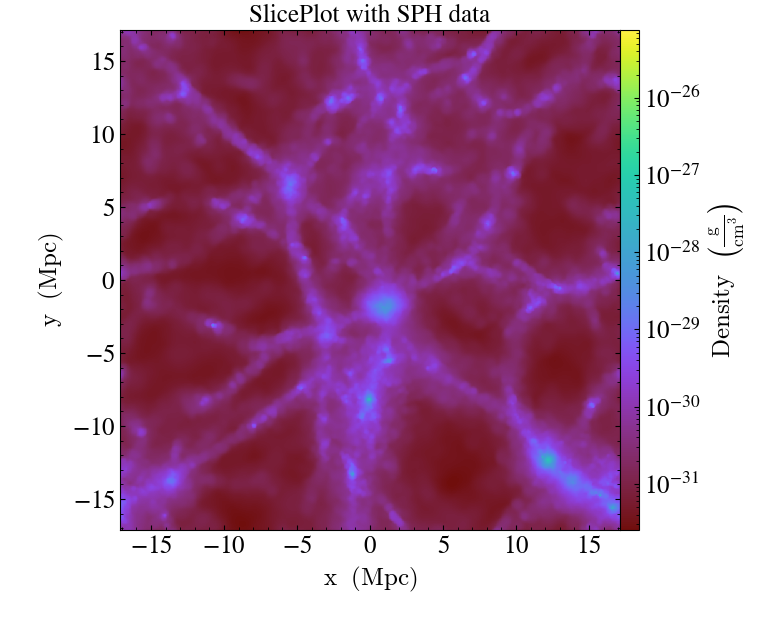

In [80]:
ds = yt.load_sample('snapshot_033')
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.set_figure_size(5)
slc.annotate_title('SlicePlot with SPH data')
fig_names.append(slc.save('figures/intro_figure_10_sph_slice.png')[0])
slc

In [81]:
prj = yt.OffAxisProjectionPlot(ds, (1., 1., 1.), ('gas', 'density'), width=(60, 'Mpc'))
prj.annotate_title('OffAxisProjectionPlot with SPH data')
prj.set_figure_size(5)
prj.set_zlim(('gas', 'density'), 1e-8, 1e-2)
fig_names.append(prj.save('figures/intro_figure_11_off_ax_sph_proj.png')[0])

yt : [INFO     ] 2025-07-11 15:26:38,771 xlim = -21.898943 21.898943
yt : [INFO     ] 2025-07-11 15:26:38,773 ylim = -21.898943 21.898943
yt : [INFO     ] 2025-07-11 15:26:38,774 zlim = -21.652800 21.652800
yt : [INFO     ] 2025-07-11 15:26:38,775 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2025-07-11 15:26:42,603 Saving plot figures/intro_figure_11_off_ax_sph_proj.png


In [82]:
ims = []
fig_names.sort()
new_ht = 400
new_wid = 0

for fig in fig_names:
    im = PIL.Image.open(fig)     
    im = resize_to_height(im, new_ht)
    # im = PIL.ImageOps.expand(im,border=10,fill='white')
    new_wid += im.size[0]
    ims.append(im)

imFull = PIL.Image.new('RGB', (new_wid, new_ht))
x = 0
for im in ims:
    imFull.paste(im, (x, 0))
    x += im.size[0]

imFull.save('figures/intro_figure_00_04_concatenated.png')